Write a report based on your observation after performing spatial filtering by your own function which:
 is equivalent of cv2.filter2D()
can be used for both 'same' and 'valid' convolution
Use the following types of kernels:
a smoothing or average kernel [e.g., a kernel with 1 only]
a Sobel kernel in x-direction and a Sobel kernel in y-direction
a Prewitt kernel in x-direction and a Prewitt kernel in y-direction
a Scharr kernel in x-direction and a Scharr kernel in y-direction
a Laplace kernel
your own four kernels which are different from known kernels
Note: Report should be prepared by Latex, code link should be included in the report instead of code

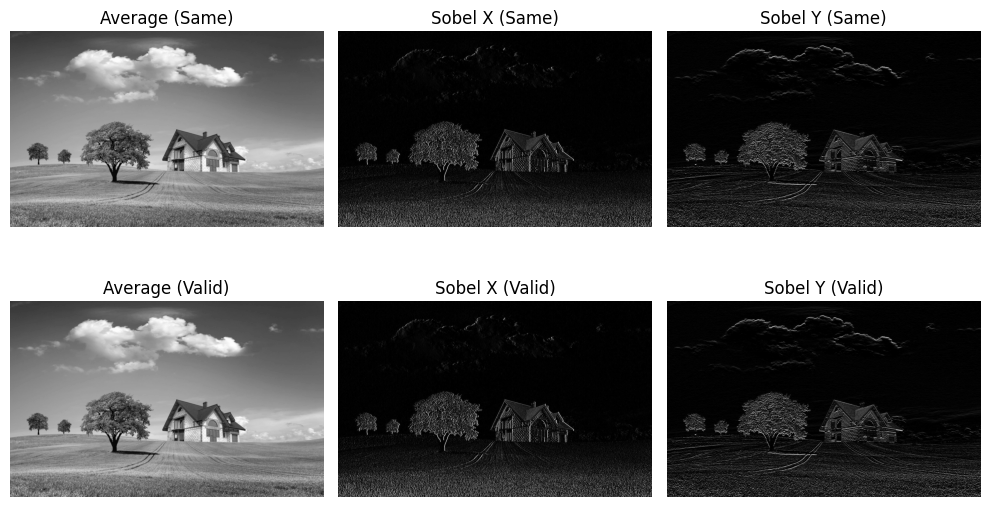

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- ছবি লোড ---
image = cv2.imread("nature3.png", cv2.IMREAD_GRAYSCALE)

# --- Kernel ডিফাইন ---
kernels = {
    "Average": np.ones((3,3), np.float32)/9,
    "Sobel X": np.array([[-1,0,1],[-2,0,2],[-1,0,1]], np.float32),
    "Sobel Y": np.array([[-1,-2,-1],[0,0,0],[1,2,1]], np.float32),
}

# --- Convolution loop ---
plt.figure(figsize=(10,6))
for i, (name, kernel) in enumerate(kernels.items(), 1):
    # SAME convolution (OpenCV automatically)
    same = cv2.filter2D(image, -1, kernel)
    
    # VALID convolution (manual crop)
    kh, kw = kernel.shape
    padded = cv2.copyMakeBorder(image, 0, 0, 0, 0, cv2.BORDER_CONSTANT, value=0)  # no padding
    full = cv2.filter2D(image, -1, kernel)
    valid = full[kh//2 : -kh//2, kw//2 : -kw//2]  # central region
    
    # Display SAME
    plt.subplot(2,3,i)
    plt.imshow(same, cmap='gray')
    plt.title(f"{name} (Same)")
    plt.axis('off')
    
    # Display VALID
    plt.subplot(2,3,i+3)
    plt.imshow(valid, cmap='gray')
    plt.title(f"{name} (Valid)")
    plt.axis('off')

plt.tight_layout()
plt.show()


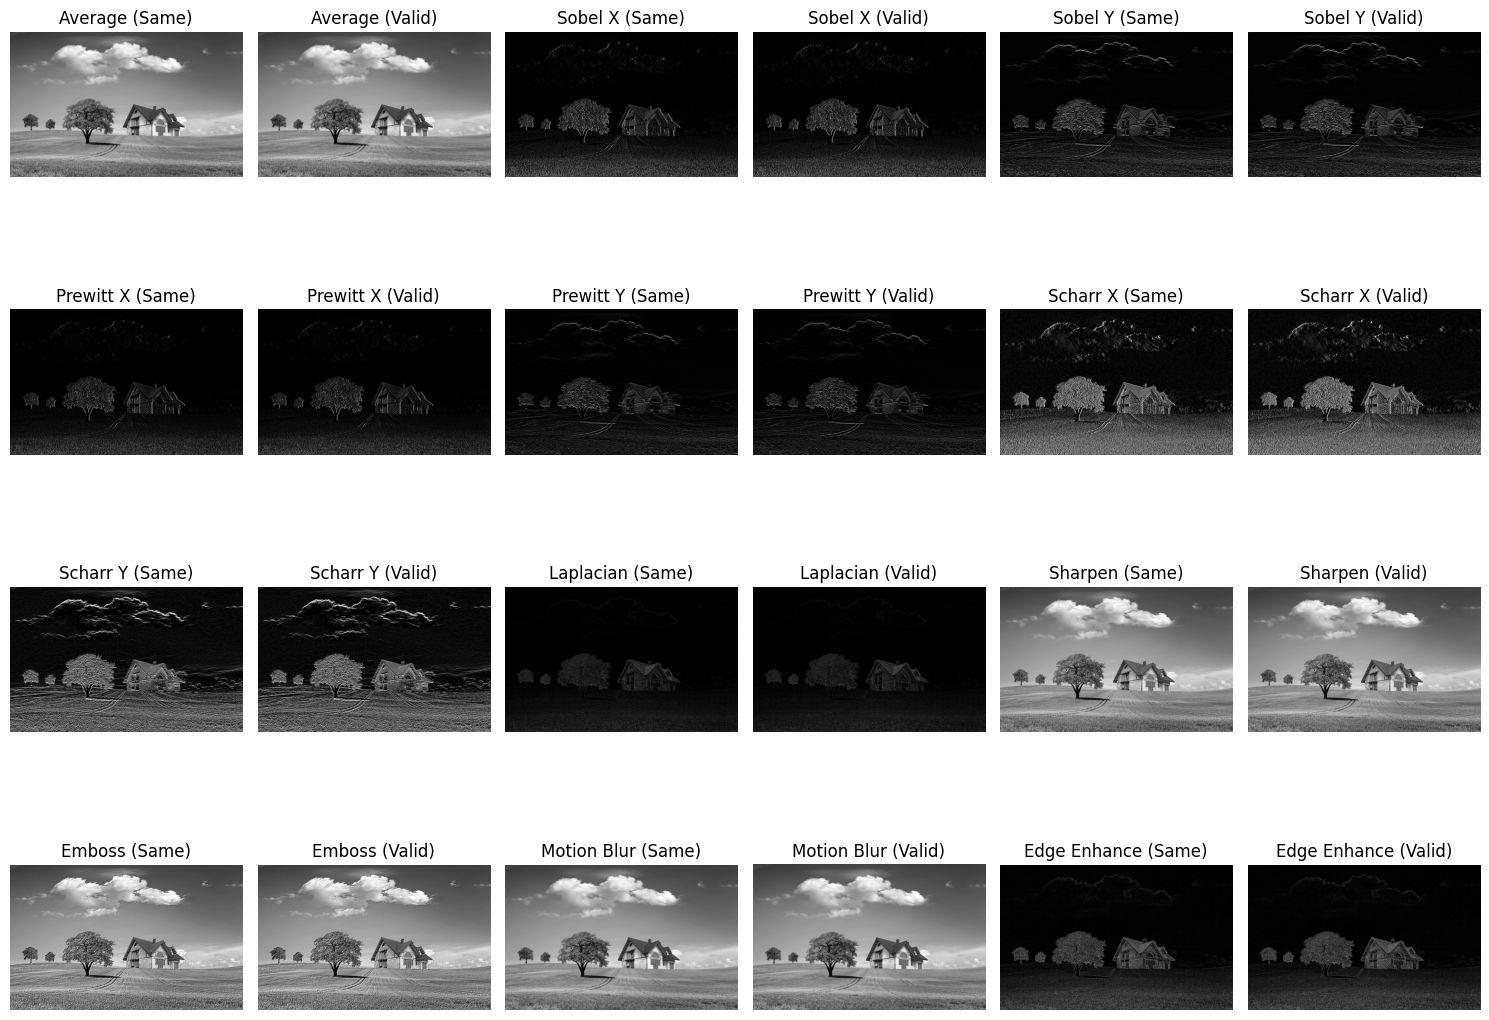

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- ছবি লোড ---
image = cv2.imread("nature3.png", cv2.IMREAD_GRAYSCALE)

# --- সব kernel ডিফাইন ---
kernels = {
    "Average": np.ones((3,3), np.float32)/9,
    "Sobel X": np.array([[-1,0,1],[-2,0,2],[-1,0,1]], np.float32),
    "Sobel Y": np.array([[-1,-2,-1],[0,0,0],[1,2,1]], np.float32),
    "Prewitt X": np.array([[-1,0,1],[-1,0,1],[-1,0,1]], np.float32),
    "Prewitt Y": np.array([[-1,-1,-1],[0,0,0],[1,1,1]], np.float32),
    "Scharr X": np.array([[-3,0,3],[-10,0,10],[-3,0,3]], np.float32),
    "Scharr Y": np.array([[-3,-10,-3],[0,0,0],[3,10,3]], np.float32),
    "Laplacian": np.array([[0,-1,0],[-1,4,-1],[0,-1,0]], np.float32),
    "Sharpen": np.array([[0,-1,0],[-1,5,-1],[0,-1,0]], np.float32),
    "Emboss": np.array([[-2,-1,0],[-1,1,1],[0,1,2]], np.float32),
    "Motion Blur": (1/5) * np.array([[1,1,1,1,1]], np.float32),
    "Edge Enhance": np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]], np.float32)
}

# --- names এবং kernels list ---
names = list(kernels.keys())
kern_list = list(kernels.values())

# --- Apply এবং Display same vs valid ---
plt.figure(figsize=(15,12))
for i in range(len(names)):
    name = names[i]
    kernel = kern_list[i]

    # SAME convolution
    same = cv2.filter2D(image, -1, kernel)

    # VALID convolution (short slice)
    kh, kw = kernel.shape
    valid = same[kh//2 : -kh//2 or None, kw//2 : -kw//2 or None]

    # Display SAME
    plt.subplot(4,6,i*2+1)
    plt.imshow(same, cmap='gray')
    plt.title(f"{name} (Same)")
    plt.axis('off')

    # Display VALID
    plt.subplot(4,6,i*2+2)
    plt.imshow(valid, cmap='gray')
    plt.title(f"{name} (Valid)")
    plt.axis('off')

plt.tight_layout()
plt.show()
